In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

 `Attribute Information:`

['age', 'year', 'nodes', 'class']

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

In [5]:
colums = ['age', 'year', 'nodes', 'class']
cancerBr = pd.read_csv('/home/bakhtawar/ds/data/haberman.csv', header=None, names=colums)
cancerBr.head()

,age,year,nodes,class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
cancerBr.describe()

,age,year,nodes,class
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


age      0
year     0
nodes    0
class    0
dtype: int64


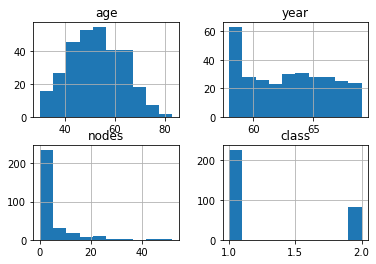

In [13]:
print( cancerBr.isna().sum() )
cancerBr.hist()
plt.show()

In [17]:
X = cancerBr.drop(['class'], axis=1)
y = cancerBr['class']

print(X.head()), print('- - - - - - - -'), print(y.tail())

   age  year  nodes
0   30    64      1
1   30    62      3
2   30    65      0
3   31    59      2
4   31    65      4
- - - - - - - -
301    1
302    1
303    1
304    2
305    2
Name: class, dtype: int64


(None, None, None)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2)

In [25]:
clf = RandomForestClassifier()
clf.fit(xTrain, yTrain)
clf.score(xTest, yTest)

0.7258064516129032

In [26]:
y_preds = clf.predict(xTest)
y_preds

array([1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1])

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(yTest, y_preds)

array([[39,  5],
       [12,  6]])

In [29]:
print(classification_report(yTest, y_preds) )

              precision    recall  f1-score   support

           1       0.76      0.89      0.82        44
           2       0.55      0.33      0.41        18

    accuracy                           0.73        62
   macro avg       0.66      0.61      0.62        62
weighted avg       0.70      0.73      0.70        62



In [31]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
from sklearn.model_selection import RandomizedSearchCV
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': [10, 100, 200, 400, 500, 600],
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': ['auto', 'sqrt'],
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': [2,4,6]
}

np.random.seed(42)

rsClf = RandomizedSearchCV(clf, model_params, n_iter=15, cv= 5, verbose=2)

rsClf.fit(xTrain, yTrain)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END max_features=sqrt, min_samples_split=6, n_estimators=600; total time=   1.0s
[CV] END max_features=sqrt, min_samples_split=6, n_estimators=600; total time=   1.0s
[CV] END max_features=sqrt, min_samples_split=6, n_estimators=600; total time=   1.0s
[CV] END max_features=sqrt, min_samples_split=6, n_estimators=600; total time=   1.0s
[CV] END max_features=sqrt, min_samples_split=6, n_estimators=600; total time=   1.0s
[CV] END max_features=auto, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_features=auto, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_features=auto, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_features=auto, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_features=auto, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_features=sqrt, min_samples_split=4, n_estimators=200; total time= 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 400, 500,
                                                         600]},
                   verbose=2)

In [34]:
rsClf.best_params_

{'n_estimators': 10, 'min_samples_split': 6, 'max_features': 'sqrt'}

In [35]:
rsClf.score(xTest, yTest)

0.7096774193548387

In [39]:
yPreds = rsClf.predict(xTest)
print( (yPreds == yTest).sum()/len(yTest) )

0.7096774193548387
